In [1]:
from math import e, factorial,log, gamma, sqrt, floor
from matplotlib import pyplot as pt

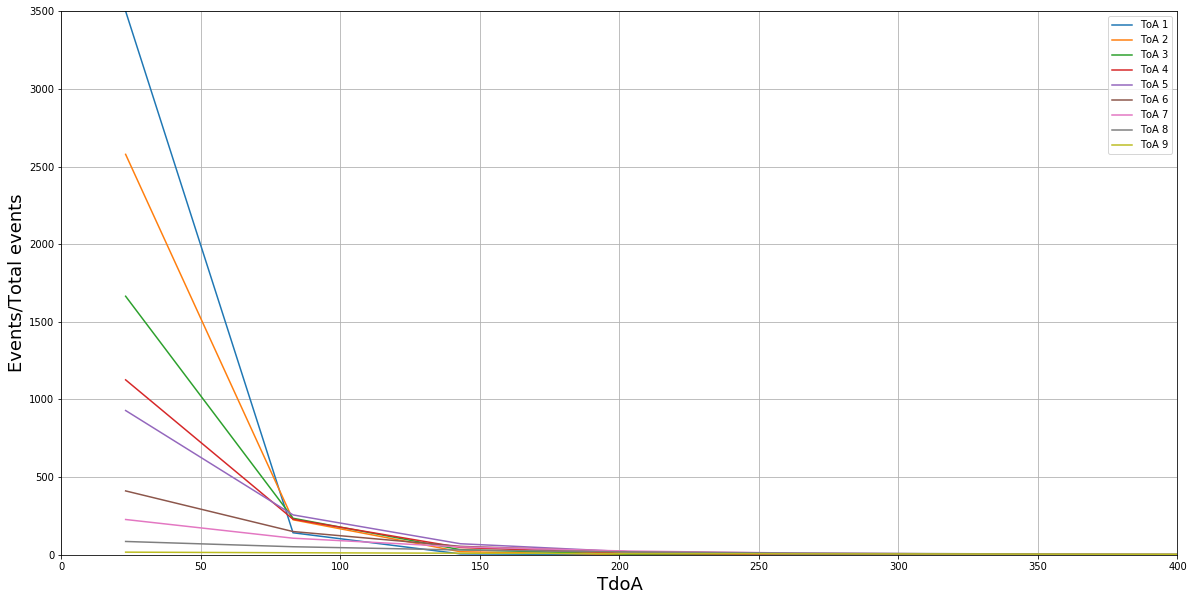

In [6]:
pt.rcParams["figure.figsize"] = (20,10)
for fi in range(1,10):
    try:
        
        f1 = open("r%d-d1-result.txt"%fi)
        raw1 = f1.read()
        f1.close()

        ToA = []    

        for i in range(len(raw1)):
            if raw1[i] == 'B':
                ToA.append(i)

        dif = []
        for j in range(1,len(ToA)):
            dif.append(ToA[j]-ToA[j-1])

        dist = {}
        lm = len(dif)/len(raw1)

        for d in dif:
            try:
                dist[d] += 1
            except:
                dist[d] = 1

        x = sorted(dist.keys())
        y = []
        for t in x:
            y.append(dist[t]/max(x))

        with open('dist.txt','w') as f:
            for p in x:
                f.write(str(p)+'\t')
            f.write('\n')

            for p in y:
                f.write(str(p)+'\t')

        expected_value = 1/y[0]

        pt.plot(x,y,label="ToA %i"%fi)
    except:
        pass


pt.xlabel(r'TdoA', fontsize = 18)
pt.ylabel(r'Events/Total events', fontsize = 18)
pt.axis([0,400,0,3500])
pt.grid(True)
pt.legend()
pt.show()